## Simulation und Modellierung WS16/17 - Uebung 05

### Aufgabe 1 : verallgemeinerte Fibonacci Zahlen

Schreiben Sie eine Funktion `AllgFib(F0=1,F1=1,a=1,b=1,N=3)`, welche die ersten `N` Folgeglieder der verallgemeinerten Fibonaccifolge

$$
    F_{n+1} = a F_n + b F_{n-1}
$$

mit den Anfangsbedingungen $F_0=$ `F0` und $F_1=$ `F1` berechnet und als Liste ausgibt. (Achtung : Die Definition in der Vorlesung war etwas anders)

Schreiben Sie eine Funktion `my_sqrt(x)`, welche mit Hilfe der verallgemeinerten Fibonacci Zahlen die Wurzel aus `x` bis auf Maschinengenauigkeit ausrechnet. Berechnen Sie $\sqrt{2}$ mit dieser Funktion. 

*Hinweis :* Iterieren Sie die Fibonacci Folge schrittweise bis sich das Verhaeltnis aufeinanderfolgender Zahlen nicht mehr aendert.

In [51]:
# Zu wenig Dokumentierung des Codes -10

def AllgFib(F0=1,F1=1,a=1,b=1,N=3):
    f_n = F1                              #Die Anfangszahlen werden der allgemeinen Formel zugeordnet
    f_nme = F0
    L=[F0,F1] 
    for x in range (N):
        f_npe = a*f_n+b*f_nme
        L.append(f_npe)                   #Der Liste werden die neuen Elemente hinzugefügt      
        f_nme=f_n    
        f_n=f_npe
    print(L)
AllgFib(N=10) ###### hier wird aber die erste 12 Zahlen zurueckgegeben? -2

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144]


In [48]:
def AllgFib(F0=1,F1=1,a=1,b=1,N=3):
    f_n = F1
    f_nme = F0
    c=0
    while 1:
        f_npe = a*f_n+b*f_nme        
        f_nme=f_n
        f_n=f_npe
        if c==f_n/f_nme: #Der Grenzwert wird ausgegeben, wenn er durch die nicht weitere Genauigkeit der gleiche wir zuvor ist
            return f_n/f_nme
            break
        c=f_n/f_nme
    
        
my_sqrt = lambda x : AllgFib(1,1,2,x-1,10)-1 ########### wird Maschinengenauigkeit ueberhaupt mit N = 10 erreicht? -10
        
print(my_sqrt(2))

1.414213562373095


### Aufgabe 2 : Collatz-Problem

Wir betrachten die folgende Abbildung ueber den *positiven* natuerlichen Zahlen

$$
    f(n) = \left\lbrace \begin{array}{ll}
                            {}n/2 \qquad &,\textrm{falls }n\textrm{ gerade} \\
                            3n+1\qquad &,\textrm{falls }n\textrm{ ungerade}
                        \end{array}
           \right.
$$

sowie die natuerliche Zahl $\tau(n)$ welche angibt, wie of $f$ iteriert werden muss, bis man die Zahl 1 erreicht, d.h.

$$
    \left(f\circ\right)^{\tau(n)}(n) = 1
$$

Schreiben Sie eine Funktion `tau(n)`, welche diese Zahl berechnet. Berechnen Sie eine Liste `L` der Werte $\tau(n)$ fuer die ersten `2**20` positiven natuerlichen Zahlen und plotten diese mit

```python
    from pylab import *
    plot(L,'.') # nur Punkte setzen, ohne diese zu verbinden
    show()
```

<a href="https://en.wikipedia.org/wiki/Collatz_conjecture">Collatz-Problem @ Wikipedia</a><br>
Collatz-Problem @ xkcd : <img src="http://imgs.xkcd.com/comics/collatz_conjecture.png">

In [61]:
n=12
x=0
while 1:
    if n%2==0:
        n=n/2
        x+=1
    else:
        n=3*n+1
        x+=1
    if n==1:
        break
    print(n)
print(x)

6.0
3.0
10.0
5.0
16.0
8.0
4.0
2.0
9


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


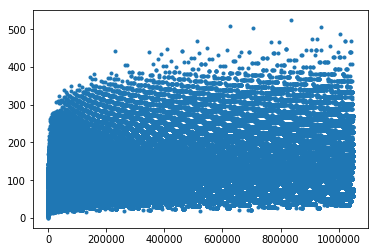

In [46]:
from pylab import *  
def tau(n):
  
    x=0
    while 1:
        if n==1:         #Die Abbbruchbedingung tritt dann ein, wenn der Wert 1 erreicht ist.
            break
        if n%2==0:       #Wenn n gerde ist, wird die Zahl halbiert
            n=n/2
            x+=1         #Die Zählvaiable zeigt die Anzahl der Iterierungsvorgänge 
        else:            #Wenn n ungerade ist geschieht die folgende Rechenoperation
            n=3*n+1
            x+=1
        
    return x
L=list()
for i in range(1,2**20):   # range( 1, 2**20 +1) -2
    L.append(tau(i))
print (L)

plot(L,'.')
show()

### Zusatzaufgabe (+10%):

- Wie lautet die Taylorentwicklung von $f(x) = \sqrt{1+x}$ ?
- Schreiben Sie eine Funktion `sqrt1px(x,eps=0)`, welche die Taylorreihe bis auf eine gegebene Genauigkeit $\varepsilon$, bzw. bis zur Konvergenz $\varepsilon=0$ berechnet.
- berechnen Sie $\sqrt{2}$ als `sqrt1px(1.0)` bzw. `1.0/sqrt1px(-0.5)`.